# Predicción de precios de casas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/housing.data", header=None, delim_whitespace=True)

## Estimador con regresión polinómica
Proponemos ajustar los datos con un modelo con 13 variables explicativas y una de respuesta (el precio de las casas). 

Buscamos usar un modelo de la forma
$$ f(\bar x) = a_0+\sum_{i=1}^{12} a_i\Phi(x_i),$$
donde $\Phi(x_i) = x_i +
Para usar mínimos cuadrados, la función de error asociada al modelo es: 
$$ E(a) = \frac{1}{2}\sum_{j=1}^{506} (y_j-f(\bar x^j)$$

Buscamos la tupla $a = (a_0,a_1,\dots, a_{12})$ que minimiza a $E$, la cual se obtiene con la siguiente fórmula: 

$$ a_{lsq} = (X^TX)^{-1}X^Ty,$$
donde $X$ es la matriz de $12\times 12$ con todos los valores de las variables dependientes, $X^T$ es su transpuesta, y $y$ es el vector de los valores de la variable respuesta. 

Debajo calculamos $a_{lsq}$. 

In [4]:
# Convert data to matrix form

numdata = np.array(data)
X = np.array(numdata[:506,:-1])
print(len(X),len(X[0]))

# Response variable vector
y = np.array(numdata[:506,-1])

# Calculate transpose of X
XT = np.transpose(X)

# Inverse of (X^TX)
I = np.linalg.inv(np.dot(XT,X))
        
# Least squares best parameters vector
altsq = np.dot(np.dot(I,XT),y)
list(altsq)



506 13


[-0.09289651702775585,
 0.048714955182939224,
 -0.004059979574991018,
 2.853998819994609,
 -2.8684363704080833,
 5.928147779052463,
 -0.00726933457606379,
 -0.9685141573950293,
 0.17115112829437867,
 -0.009396215397159187,
 -0.39219092629486224,
 0.014905610228201551,
 -0.41630447073747245]

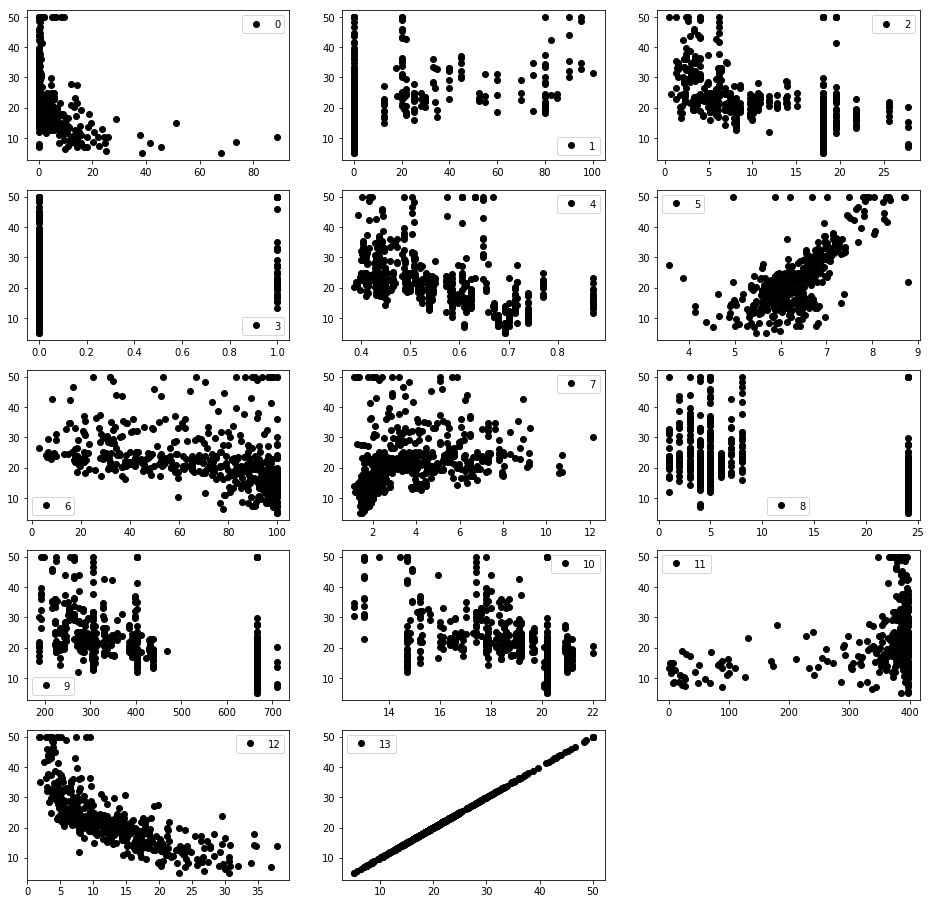

In [5]:
gs = plt.GridSpec(5,3)
fig = plt.figure(figsize=(16,16))
for i in range(0,4): 
    for j in range(0,3):
        fig.add_subplot(gs[i,j]).plot(X[0:,(3*i)+j], y, 'ko', label = (3*i)+j)
        plt.legend()
fig.add_subplot(gs[4,0]).plot(X[0:,12], y, 'ko', label = 12)
plt.legend()
fig.add_subplot(gs[4,1]).plot(y, y, 'ko', label = 13)
plt.legend()

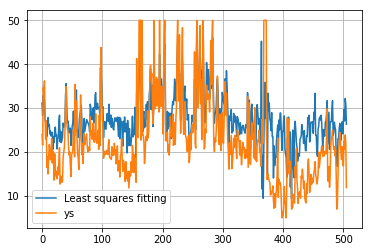

In [6]:
# Estimator 
def estimation(x):
    y_estimated = 0.0
    for i in range(0,12):
        y_estimated = y_estimated + (altsq[i] * x[i])
    return y_estimated

estimated = [estimation(X[i]) for i in range(0,len(y))]
xs = [i for i in range(0,len(y))]

plt.plot(xs, estimated, label = 'Least squares fitting')
plt.plot(xs, y, label = 'ys')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Import my implementation of polynomial multiple regression, see polynomialReg.py for details
from polynomialReg import *

X = data.values[0:,:-1]
print(X[0])
y = data.values[0:,-1]

# Call implementation of multiple polynomial regression with polynomial of degree 1 for a linear fitting
mlin_reg = polynomial_linreg(X,y,1)
mlin_reg.fit()
print(list(mlin_reg.a))
print(mlin_reg.sqerror(X,y))

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
[36.45948838508972, -0.10801135783679669, 0.04642045836688134, 0.0205586263670718, 2.686733819344884, -17.766611228300135, 3.8098652068092216, 0.0006922246403442628, -1.4755668456002544, 0.30604947898517426, -0.012334593916574496, -0.9527472317072841, 0.009311683273793888, -0.5247583778554887]


IndexError: invalid index to scalar variable.